In [1]:
#import networkx as nx
#import pandas as pd
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
#import matplotlib.pyplot.legend
import time


In [4]:
def V(num):
    return 4*num+1

def S(num):
    return 2*num+1

def fG(num):
    return 2*num-1

def ruleTwo(num):
        result = (num-1)/2
        r = 0
        k = 0

        while result % 2 != 0:
            result = (result-1)/2
            k+=1

        r = result/2

        if ((k) % 2 == 0 and r % 2 == 0) or ((k) % 2 != 0 and r % 2 != 0):
            return (True)
        else:
            return (False)

def isIncluded(numberArr, number):
    # for i in arr:
    #     if i == num:
    #         return True
        
    # return False
    if len(numberArr) > 0:
        numberArr.sort()
        
        left = int(0)
        right = int(len(numberArr)-1)
        i = int(0)
        
        
        while left <= right:
            
            i = int((left + right)/2)
            if numberArr[i] == number:
                return True
            
            elif numberArr[i] < number:
                left = i+1
            else:
                right = i-1
        
            
        if numberArr[i] == number:
            return True
        else:
            return False
    else:
        return False

def getType(label):
    if (label + 1) % 3 == 0:
        return 1
    elif label % 3 == 0:
        return 2
    elif (label - 1) % 3 == 0:
        return 3
    return -1

arrInfo = []
rowStartLabel = []
saveArrInfo = []

def setStartArr(n):
    for i in range(0,n):
        if i == 0:
            arrInfo.append(0)
            saveArrInfo.append(0)
            rowStartLabel.append(1)
        elif i == 1:
            arrInfo.append(0)
            saveArrInfo.append(0)
            rowStartLabel.append(3)
        elif i == 2:
            arrInfo.append(2)
            saveArrInfo.append(2)
            rowStartLabel.append(5)
        else:
            arrInfo.append(3**(i-1))
            saveArrInfo.append(3**(i-1))
            rowStartLabel.append(3**(i-1) + 2)

    #print(rowStartLabel)

        #blue_expenses.append(0)

    return arrInfo, saveArrInfo, rowStartLabel#, blue_expenses


def numbersAbove(arrOne, arrTwo, row):
    count = 0
    
    for i in range(row, len(arrOne)):
        count += (arrOne[i]-arrTwo[i])

    return count

def getCounter(rowStartLabel, value):
    
    counter = 0
    
    for start in rowStartLabel:
        if counter != len(rowStartLabel):
            if value < rowStartLabel[counter]:
                break
            else:
                counter = counter + 1
        elif counter == len(rowStartLabel):
            break

    return counter


In [5]:
# Rules
# Change n to choose size of Tree

n=13


expenses = []
rows = []
big_leaf = (3**(n-1))
used = []
proven = []
proven.append(3)
proven.append(5)
#proven.append(19)
arrInfo = []
rowStartLabel = []
saveArrInfo = []
arrInfo, saveArrInfo, rowStartLabel = setStartArr(n)
counter = 0
totalNumber = 0
#print(rowStartLabel)
#print(arrInfo)

print(saveArrInfo)

start_time = time.time()

while len(proven) > 0:
    proven.sort()
    #print(proven)
    totalNumber += 1
    for i in proven:   
        if isIncluded(used, i) == False:       
            
            # RULE 1 : if x is orange V(x) becomes orange 
            if V(i) <= big_leaf + 1:                
                value1 = V(i)
                counter = 0
                
                if isIncluded(used, value1) == False:
                    proven.append(V(i))                 
                    counter = getCounter(rowStartLabel, value1)
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
            r2 = ruleTwo(i)
            if r2: 
                
                if S(i) <= big_leaf + 1:
                    value2 = S(i)
                    counter = 0
                    
                    if isIncluded(used, value2) == False:
                        proven.append(S(i))
                        counter = getCounter(rowStartLabel, value2)
                        arrInfo[counter-1] -= 1

                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange
            if getType(i) == 3:             
                value3 = int((4*i-1)/3)
                counter = 0
                
                if value3 <= big_leaf + 1:  
                    
                    if isIncluded(used, value3) == False:
                        proven.append(value3)
                        counter = getCounter(rowStartLabel, value3)                     
                        arrInfo[counter-1] -= 1
                        
                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange                   
            if getType(i) == 1:                       
                value4 = int(fG(i)/3)                                     
                
                if isIncluded(used, value4) == False:   
                    proven.append(value4)
                    #print(value4)
                    counter = 0 
                    counter = getCounter(rowStartLabel, value4)               
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            proven.remove(i)
            used.append(i)
            break
        else:
            proven.remove(i)

print(arrInfo)

#dif = []
#for i in range(0,len(arrInfo)):
    
    
    
    # if i == 0:
    #     dif.append(expenses[i])
    # else:
    #     dif.append(expenses[i] - expenses[i-1])



#expenses = [9, 8, 518, 504, 1002, 944, 8588, 43140, 170975, 169954, 1852676, 2052650]
#rows = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
print("--- %s seconds ---" % (time.time() - start_time))
print()
print("total Number:")
print(totalNumber)
print()
print("expenses of the compleded rows starting with row 3")
print(expenses)
print()
print("total expense")
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
plt.savefig("expanses.png",dpi=300)
print()
print("log(expense)")
plt.yscale('log')
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')

compareThree = []#[3**2, 3**3,3**4,3**5,3**6,3**7,3**8,3**9,3**10,3**11,3**12]
comparebelow = []
compareabove = []



for i in rows:
    compareThree.append(3**(i-1))
    comparebelow.append(2.5**(i-1))
    compareabove.append(3.5**(i-1))

plt.plot(rows, comparebelow, linestyle = 'solid')
plt.plot(rows, compareabove, linestyle = 'solid')
plt.plot(rows, compareThree, linestyle = 'solid')
plt.show()
plt.show()
plt.savefig("expanses_log2.png",dpi=300)
# print()
# print("difference")
# plt.plot(rows, dif, marker = 'o', linestyle = 'solid')
# plt.show()




[0, 0, 2, 9, 27, 81, 243, 729, 2187, 6561, 19683, 59049, 177147]
3: 11
[0, 0, 0, 3, 22, 81, 243, 729, 2187, 6561, 19683, 59049, 177147]
4: 521
[0, 0, 0, 0, 2, 16, 94, 538, 2096, 6561, 19683, 59049, 177147]
5: 498
[0, 0, 0, 0, 0, 14, 94, 538, 2096, 6561, 19683, 59049, 177147]
6: 950
[0, 0, 0, 0, 0, 0, 22, 335, 1852, 6561, 19683, 59049, 177147]
7: 33206
[0, 0, 0, 0, 0, 0, 0, 16, 115, 983, 8163, 47025, 175848]


KeyboardInterrupt: 


expenses of the compleded rows starting with row 3
[11, 521, 498, 950, 33206, 170905]

total expense


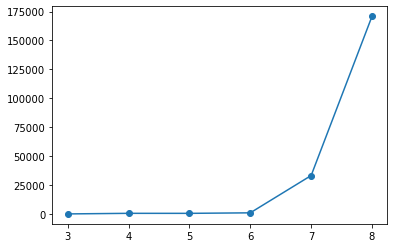


log(expense)


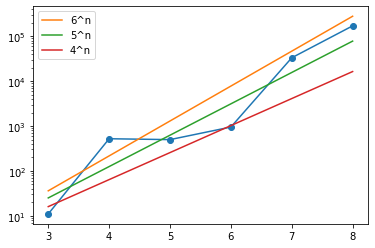

<Figure size 432x288 with 0 Axes>

In [3]:
# hardcoded 
import matplotlib.ticker as mtick

compareThree = []#[3**2, 3**3,3**4,3**5,3**6,3**7,3**8,3**9,3**10,3**11,3**12]
comparebelow = []
compareabove = []

rows = [3,4,5,6,7,8] #[1,2,3,4,5,6]
expenses = [11,521,498,950,33206,170905]

for i in rows:
    compareThree.append(5**(i-1))
    comparebelow.append(6**(i-1))
    compareabove.append(4**(i-1))

print()
print("expenses of the compleded rows starting with row 3")
print(expenses)
print()
print("total expense")
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%.0f"))
plt.show()
plt.savefig("expanses.png",dpi=300)
print()
print("log(expense)")
plt.yscale('log')
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.plot(rows, comparebelow, linestyle = 'solid', label="6^n")
plt.plot(rows, compareThree, linestyle = 'solid', label="5^n")
plt.plot(rows, compareabove, linestyle = 'solid', label="4^n")


plt.legend()

plt.show()
plt.savefig("expanses_log2.png",dpi=300)

In [2]:
# # Blue Expense

# n=12


# expenses = []
# rows = []
# big_leaf = (2**n)-1
# used = []
# proven = []
# proven.append(3)
# proven.append(5)
# #proven.append(19)
# arrInfo = []
# blue_expenses = []
# rowStartLabel = []
# saveArrInfo = []
# arrInfo, saveArrInfo, rowStartLabel, blue_expenses = setStartArr(n)
# counter = 0

# while len(proven) > 0:
#     proven.sort()
#     for i in proven: 
        
        
#         if isIncluded(used, i) == False:       
#             if getType(i) == 2:
#                 # RULE 1 : if x is orange V(x) becomes orange 
#                 if V(i) <= big_leaf + 1:                
#                     value1 = V(i)
#                     counter = 0
                    
#                     if isIncluded(used, value1) == False:
#                         proven.append(V(i))                 
#                         counter = getCounter(rowStartLabel, value1)
#                         arrInfo[counter-1] -= 1
                        
#                         if arrInfo[counter-1] == 0:
#                             expense = numbersAbove(saveArrInfo, arrInfo, counter)
#                             expenses.append(expense)
#                             rows.append(counter)
#                             print("{0}: {1}".format(counter, expense))
#                             print("left")
#                             print("{0}".format(arrInfo))
#                             print("blue_expenses")
#                             print(blue_expenses)

#                     # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
#                     r2 = ruleTwo(i)
#                     if r2: 
                        
#                         if S(i) <= big_leaf + 1:
#                             value2 = S(i)
#                             counter = 0
                            
#                             if isIncluded(used, value2) == False:
#                                 proven.append(S(i))
#                                 counter = getCounter(rowStartLabel, value2)
#                                 arrInfo[counter-1] -= 1

#                                 if arrInfo[counter-1] == 0:
#                                     expense = numbersAbove(saveArrInfo, arrInfo, counter)
#                                     expenses.append(expense)
#                                     rows.append(counter)
#                                     print("{0}: {1}".format(counter, expense))
#                                     print("left")
#                                     print("{0}".format(arrInfo))
#                                     print("blue_expenses")
#                                     print(blue_expenses)
#                 proven.remove(i)
#                 used.append(i)

#                 counter = getCounter(rowStartLabel, i)
#                 blue_expenses[counter-1] += 1

#                 break

#             if getType(i) == 3:
#                 # RULE 1 : if x is orange V(x) becomes orange 
#                 if V(i) <= big_leaf + 1:                
#                     value1 = V(i)
#                     counter = 0
                    
#                     if isIncluded(used, value1) == False:
#                         proven.append(V(i))                 
#                         counter = getCounter(rowStartLabel, value1)
#                         arrInfo[counter-1] -= 1
                        
#                         if arrInfo[counter-1] == 0:
#                             expense = numbersAbove(saveArrInfo, arrInfo, counter)
#                             expenses.append(expense)
#                             rows.append(counter)
#                             print("{0}: {1}".format(counter, expense))
#                             print("left")
#                             print("{0}".format(arrInfo))
#                             print("blue_expenses")
#                             print(blue_expenses)

#                 # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
#                 r2 = ruleTwo(i)
#                 if r2: 
                    
#                     if S(i) <= big_leaf + 1:
#                         value2 = S(i)
#                         counter = 0
                        
#                         if isIncluded(used, value2) == False:
#                             proven.append(S(i))
#                             counter = getCounter(rowStartLabel, value2)
#                             arrInfo[counter-1] -= 1

#                             if arrInfo[counter-1] == 0:
#                                 expense = numbersAbove(saveArrInfo, arrInfo, counter)
#                                 expenses.append(expense)
#                                 rows.append(counter)
#                                 print("{0}: {1}".format(counter, expense))
#                                 print("left")
#                                 print("{0}".format(arrInfo))
#                                 print("blue_expenses")
#                                 print(blue_expenses)

#                 # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange
#                 if getType(i) == 3:             
#                     value3 = int((4*i-1)/3)
#                     counter = 0
                    
#                     if value3 <= big_leaf + 1:  
                        
#                         if isIncluded(used, value3) == False:
#                             proven.append(value3)
#                             counter = getCounter(rowStartLabel, value3)                     
#                             arrInfo[counter-1] -= 1
                            
#                             if arrInfo[counter-1] == 0:
#                                 expense = numbersAbove(saveArrInfo, arrInfo, counter)
#                                 expenses.append(expense)
#                                 rows.append(counter)
#                                 print("{0}: {1}".format(counter, expense))
#                                 print("left")
#                                 print("{0}".format(arrInfo))
#                                 print("blue_expenses")
#                                 print(blue_expenses)

#                 proven.remove(i)
#                 used.append(i)

#                 counter = getCounter(rowStartLabel, i)
#                 blue_expenses[counter-1] += 1

#                 break

#             if getType(i) == 1:
#                 # RULE 1 : if x is orange V(x) becomes orange 
#                 if V(i) <= big_leaf + 1:                
#                     value1 = V(i)
#                     counter = 0
                    
#                     if isIncluded(used, value1) == False:
#                         proven.append(V(i))                 
#                         counter = getCounter(rowStartLabel, value1)
#                         arrInfo[counter-1] -= 1
                        
#                         if arrInfo[counter-1] == 0:
#                             expense = numbersAbove(saveArrInfo, arrInfo, counter)
#                             expenses.append(expense)
#                             rows.append(counter)
#                             print("{0}: {1}".format(counter, expense))
#                             print("left")
#                             print("{0}".format(arrInfo))
#                             print("blue_expenses")
#                             print(blue_expenses)

#                 # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
#                 r2 = ruleTwo(i)
#                 if r2: 
                    
#                     if S(i) <= big_leaf + 1:
#                         value2 = S(i)
#                         counter = 0
                        
#                         if isIncluded(used, value2) == False:
#                             proven.append(S(i))
#                             counter = getCounter(rowStartLabel, value2)
#                             arrInfo[counter-1] -= 1

#                             if arrInfo[counter-1] == 0:
#                                 expense = numbersAbove(saveArrInfo, arrInfo, counter)
#                                 expenses.append(expense)
#                                 rows.append(counter)
#                                 print("{0}: {1}".format(counter, expense))
#                                 print("left")
#                                 print("{0}".format(arrInfo))
#                                 print("blue_expenses")
#                                 print(blue_expenses)

#                 # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange                   
#                 if getType(i) == 1:                       
#                     value4 = int(fG(i)/3)                                     
                    
#                     if isIncluded(used, value4) == False:   
#                         proven.append(value4)
#                         #print(value4)
#                         counter = 0 
#                         counter = getCounter(rowStartLabel, value4)               
#                         arrInfo[counter-1] -= 1
                        
#                         if arrInfo[counter-1] == 0:
#                             expense = numbersAbove(saveArrInfo, arrInfo, counter)
#                             expenses.append(expense)
#                             rows.append(counter)
#                             print("{0}: {1}".format(counter, expense))
#                             print("left")
#                             print("{0}".format(arrInfo))
#                             print("blue_expenses")
#                             print(blue_expenses)

#                 proven.remove(i)
#                 used.append(i)

#                 counter = getCounter(rowStartLabel, i)
#                 blue_expenses[counter-1] += 1

#                 break
#         else:
#             proven.remove(i)
#             if isIncluded(used, i) == False:
#                 used.append(i)


# #print(arrInfo)
# dif = []
# for i in range(0,len(expenses)):
#     if i == 0:
#         dif.append(expenses[i])
#     else:
#         dif.append(expenses[i] - expenses[i-1])

# print()
# print("expenses of the compleded rows starting with row 3")
# print(expenses)
# print("blue_expenses")
# print(blue_expenses)
# print()
# print("total expense")
# plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
# plt.show()
# plt.savefig("expanses.png",dpi=300)
# print()
# print("log(expense)")
# plt.yscale('log')
# plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
# plt.show()
# plt.savefig("expanses_log2.png",dpi=300)
# # print()
# # print("difference")
# # plt.plot(rows, dif, marker = 'o', linestyle = 'solid')
# # plt.show()

                